In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("auto.csv")
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [3]:
X = df['displ'].values.reshape(-1,1)
y = df['mpg'].values

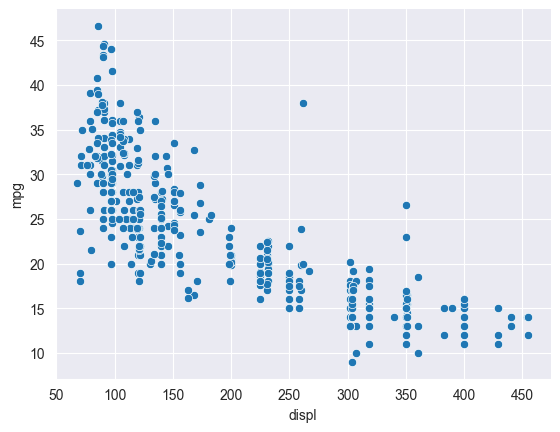

In [4]:
sns.set_style("darkgrid")
sns.scatterplot(data=df,x="displ",y="mpg")
sns.despine()
plt.show()

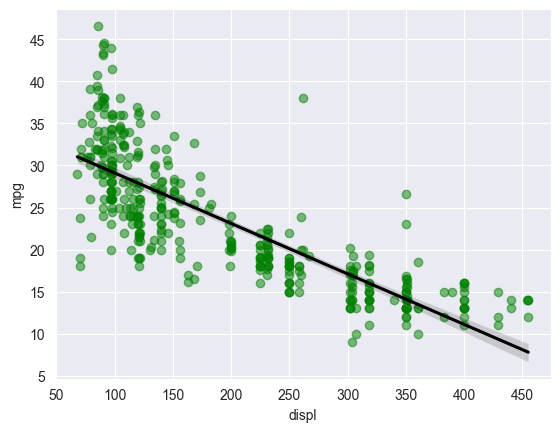

In [5]:
sns.regplot(data=df,x="displ",y="mpg",line_kws={'color':'black'},scatter_kws={'alpha':0.5,'color':'green'})
plt.show()

In [6]:
#import DicisionTree regressior
from sklearn.tree import DecisionTreeRegressor

#import train test split
from sklearn.model_selection import train_test_split

#import mean square error
from sklearn.metrics import mean_squared_error as MSE 

#split the data into 80% train and 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


#Intantiate the dt
dt = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=42)

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

mse_dt = MSE(y_test,y_pred)

rmse_dt = mse_dt**(1/2)

print(f"Mean square value of Dt model is : {mse_dt}")
print(f"Root Means Square value of Dt model is : {rmse_dt}")


Mean square value of Dt model is : 20.355224440549925
Root Means Square value of Dt model is : 4.511676455659241


In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mse_lr = MSE(y_pred,y_test)
rmse_lr = mse_lr**(1/2)

print(f"Mean square value of Dt model is : {mse_lr}")
print(f"Root Means Square value of Dt model is : {rmse_lr}")

Mean square value of Dt model is : 20.373750293506987
Root Means Square value of Dt model is : 4.513729089512018


K-FOLD Cross Validation

In [8]:
#import the crossvalidation

from sklearn.model_selection import cross_val_score

#split the data into 70% train and 30% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2022,)

dt = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.14,random_state=2022)

MSE_CV = -cross_val_score(dt,X_train,y_train,cv=10,scoring="neg_mean_squared_error",n_jobs=-1)

#fit Dt to the train set
dt.fit(X_train,y_train)

#predict the labels
y_pred_train = dt.predict(X_train)

y_pred_test = dt.predict(X_test)

print(f"Cross Validation mean square error : {MSE_CV.mean()}")

print(f"Train set MSE : {MSE(y_train,y_pred_train)}")
print(f"Test set MSE : {MSE(y_test,y_pred_test)}")

Cross Validation mean square error : 18.77593041287745
Train set MSE : 16.724016228190017
Test set MSE : 22.22874985679659


In [9]:
df.columns

Index(['mpg', 'displ', 'hp', 'weight', 'accel', 'origin', 'size'], dtype='object')

In [10]:
X = df.drop(["mpg","origin"],axis=1).values
y = df['mpg'].values

## Random Forest Regression

In [11]:
#standard imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE 

#set seed for reproducability
SEED = 2023



In [12]:
#split the train and test data into 70% train and 30% test

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=SEED,test_size=0.3)

rf = RandomForestRegressor(n_estimators=400,n_jobs=-1,min_samples_leaf=0.12,random_state=SEED)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

In [13]:
#Evaluate the RMSE

rmse = (MSE(y_test,y_pred))**(1/2)

print(f"Root mean square score is : {rmse}")

Root mean square score is : 3.976855340448873


Feature importance

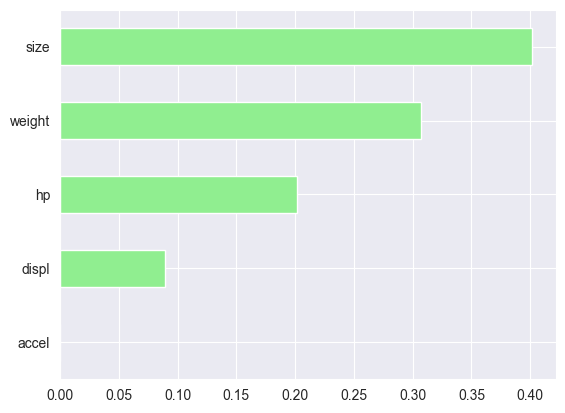

In [14]:
#Create a pd sereies of feature importance 
importance_rf = pd.Series(rf.feature_importances_,index= [ 'displ', 'hp', 'weight', 'accel', 'size'])

#sort importance_rf
sorted_importance = importance_rf.sort_values()

#make a horizontal bar plot
sorted_importance.plot(kind='barh',color='lightgreen')
plt.show()



## Boosting

### ADABOOST - adaptive boosting

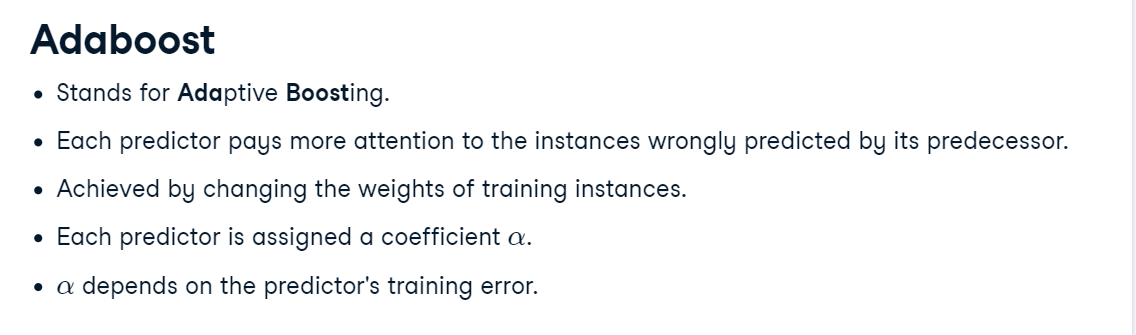

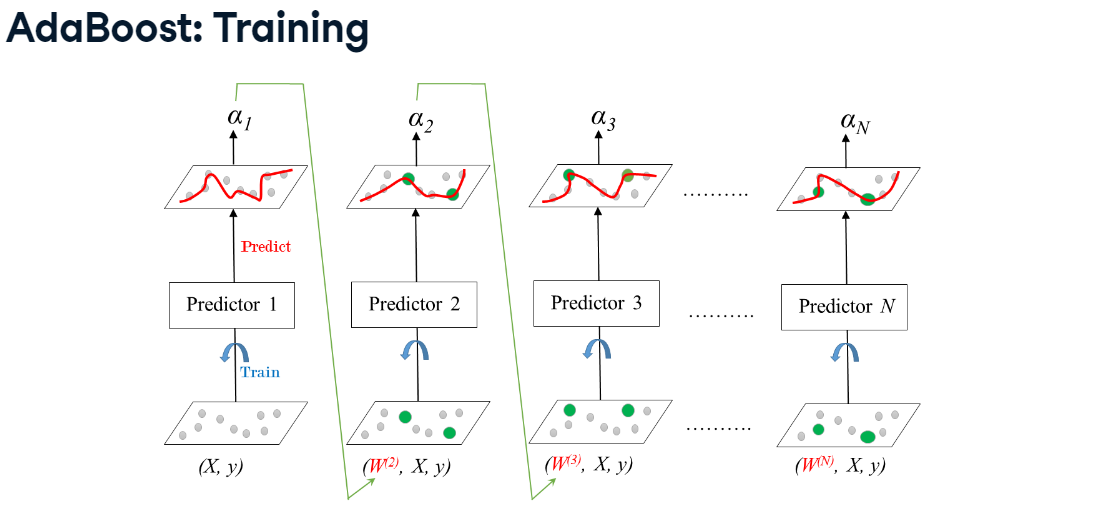

In [21]:
#standard imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.tree import DecisionTreeRegressor


#set seed for reproducability
SEED = 202

#split the train and test data into 70% train and 30% test

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=SEED,test_size=0.3)

dt = DecisionTreeRegressor(max_depth=1,random_state=SEED)

adbc = AdaBoostRegressor(base_estimator=dt,n_estimators=200)

adbc.fit(X_train,y_train)

y_pred_adbc = adbc.predict(X_test)


#Evaluate the RMSE

rmse = (MSE(y_test,y_pred_adbc))**(1/2)

print(f"Root mean square score is : {rmse}")

Root mean square score is : 4.672086383809788


### Gradient boosting

In [22]:
#import models for utility function
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#set seed for reproducability
SEED = 2024

#split the train and test data into 70% train and 30% test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=SEED,test_size=0.3)

#instantitate the Gradient boosting regressor
gb = GradientBoostingRegressor(n_estimators=300,max_depth=1,random_state=SEED)

#fit gb to the traininng set
gb.fit(X_train,y_train)

#predict the result and store it in y_pred
y_pred = gb.predict(X_test)

#evaludation
mse_score = MSE(y_test,y_pred)
rmse = mse_score**(1/2)

print(f"The Mean square error of gradieent boosting is {mse_score} and rmse is {rmse}")




The Mean square error of gradieent boosting is 14.171107649942472 and rmse is 3.764453167452409


## Stochastic Gradient Boosting

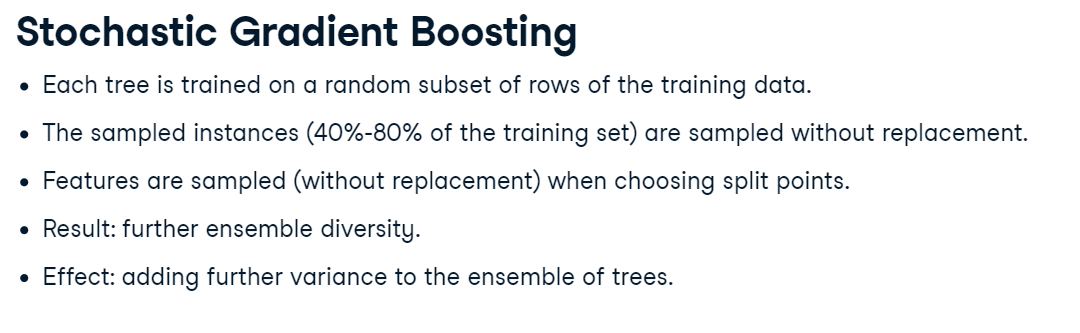

In [23]:
#import models for utility function
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#set seed for reproducability
SEED = 2024

#split the train and test data into 70% train and 30% test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=SEED,test_size=0.3)

#instantitate the Gradient boosting regressor
gb = GradientBoostingRegressor(n_estimators=300,max_depth=1,random_state=SEED,subsample=0.8,max_features=0.2)

#fit gb to the traininng set
gb.fit(X_train,y_train)

#predict the result and store it in y_pred
y_pred = gb.predict(X_test)

#evaludation
mse_score = MSE(y_test,y_pred)
rmse = mse_score**(1/2)

print(f"The Mean square error of gradieent boosting is {mse_score} and rmse is {rmse}")




The Mean square error of gradieent boosting is 12.282209178999436 and rmse is 3.504598290674615


## hyperparametr

### Tuning th hyperparameter
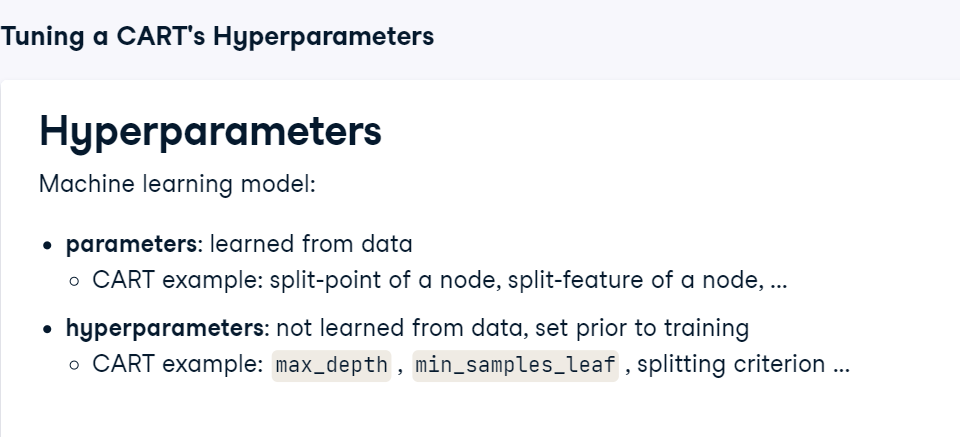

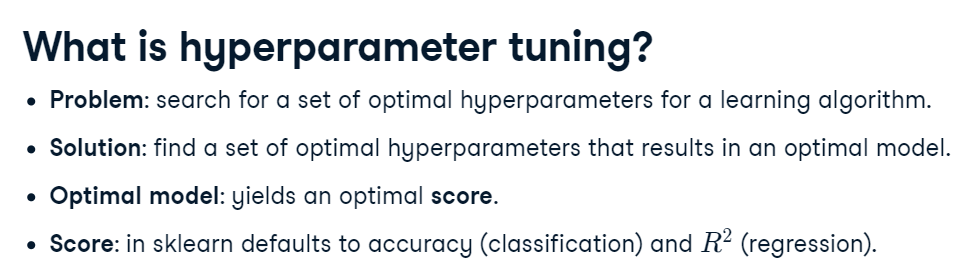

In [24]:
# Define the dictionary 'params_rf'
params_rf = {
             'n_estimators': [100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [2, 10, 30], 
             }

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'